**Projekt zaliczeniowy przedmiotu Uczenie Maszynowe - Mariusz Pawłowski**



**Przewidywanie cukrzycy** dzięki informacjom medycznym oraz danym demograficznym pobranych od pacjentów wraz z informacją o ich statusie cukrzycowym (czy są pozytywni czy negatywni). Wśród tych danych znajdują się takie informacje jak wiek, płeć, wskaźnik masy ciała (BMI), nadciśnienie, choroby serca, historię palenia tytoniu, poziom HbA1c oraz poziom glukozy we krwi. Taki zbiór danych może posłużyć do przewidywania ryzyka zachorowania na cukrzycę na podstawie historii medycznej i danych demograficznych pacjentów. 

**Informacje o danych:**

1. gender - płeć pacjenta
2. age - wiek pacjenta
3. hypertension - nadciśnienie tętniczne (jeśli występuje to wartość 1)
4. Heart disease - choroby serca (jeśli występuje to wartość 1)
5. Smoking history - czy pacjent palił papierosy
6. BMI - wskaźnik poziomu tkanki tłuszczowej
7. HbA1c level - średnie stężenie glukozy we krwi w ciągu 2-3 miesięcy
8. Blood glucose level - poziom glukozy w danym momencie
9. Diabetes - cukrzyca (jeśli występuje to wartość 1)


# #Wygrywamy biblioteki


In [197]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# #Wczytanie bazy danych

In [198]:
df = pd.read_csv('dane/cukrzyca_dane.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27528 entries, 0 to 27527
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               27528 non-null  object 
 1   age                  27528 non-null  float64
 2   hypertension         27528 non-null  int64  
 3   heart_disease        27528 non-null  int64  
 4   smoking_history      27528 non-null  object 
 5   bmi                  27528 non-null  float64
 6   HbA1c_level          27528 non-null  float64
 7   blood_glucose_level  27528 non-null  int64  
 8   diabetes             27528 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 1.9+ MB


# #Statystyki opisowe

In [200]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,27528.0,42.005618,22.498018,0.08,24.00,43.00,60.00,80.00
hypertension,27528.0,0.077194,0.266904,0.00,0.00,0.00,0.00,1.00
heart_disease,27528.0,0.038797,0.193114,0.00,0.00,0.00,0.00,1.00
bmi,27528.0,27.369845,6.682188,10.01,23.71,27.32,29.61,88.72
HbA1c_level,27528.0,5.524415,1.078814,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,27528.0,138.018817,40.993501,80.00,100.00,140.00,159.00,300.00
diabetes,27528.0,0.085731,0.279971,0.00,0.00,0.00,0.00,1.00


# #Kodowanie etykiet dla kolumny 'gender'

In [201]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,never,25.19,6.6,140,0
1,0,54.0,0,0,No Info,27.32,6.6,80,0
2,1,28.0,0,0,never,27.32,5.7,158,0
3,0,36.0,0,0,current,23.45,5.0,155,0
4,1,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
27523,0,28.0,0,0,No Info,40.10,6.0,90,0
27524,1,31.0,0,0,current,19.81,6.2,155,0
27525,1,14.0,0,0,never,27.32,6.5,130,0
27526,1,53.0,0,0,never,29.40,6.6,155,0


In [202]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,27528.0,0.412489,0.492660,0.00,0.00,0.00,1.00,2.00
age,27528.0,42.005618,22.498018,0.08,24.00,43.00,60.00,80.00
hypertension,27528.0,0.077194,0.266904,0.00,0.00,0.00,0.00,1.00
heart_disease,27528.0,0.038797,0.193114,0.00,0.00,0.00,0.00,1.00
bmi,27528.0,27.369845,6.682188,10.01,23.71,27.32,29.61,88.72
HbA1c_level,27528.0,5.524415,1.078814,3.50,4.80,5.80,6.20,9.00
blood_glucose_level,27528.0,138.018817,40.993501,80.00,100.00,140.00,159.00,300.00
diabetes,27528.0,0.085731,0.279971,0.00,0.00,0.00,0.00,1.00


# #Wizualizacja danych

<Axes: xlabel='diabetes', ylabel='count'>

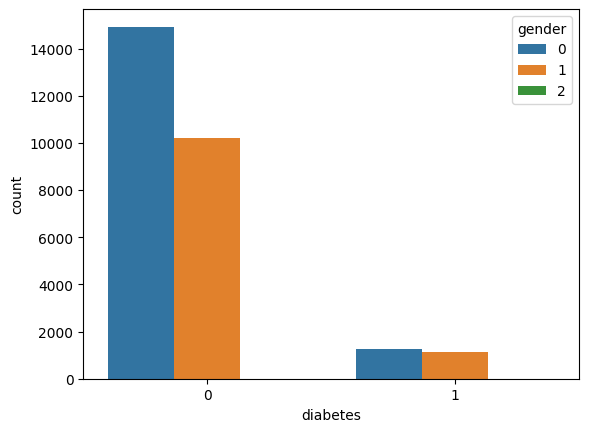

In [203]:
sns.countplot(x = df["diabetes"], hue=df["gender"])

<Axes: xlabel='diabetes', ylabel='count'>

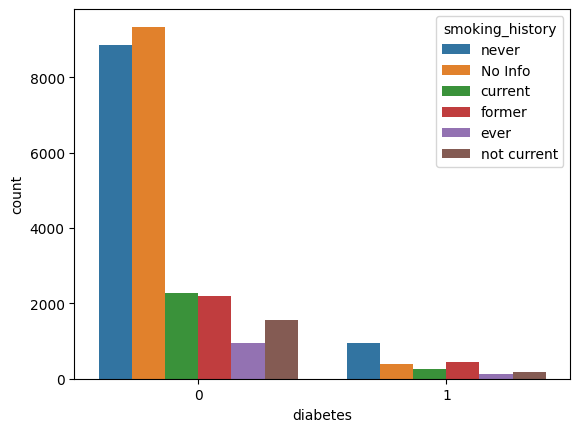

In [204]:
sns.countplot(x = df["diabetes"], hue=df["smoking_history"])

<Axes: xlabel='age', ylabel='HbA1c_level'>

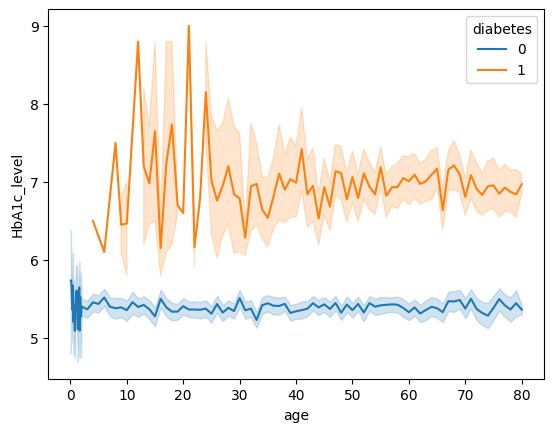

In [205]:

sns.lineplot(df, x= df['age'], y=df['HbA1c_level'], hue = df['diabetes'])

<Axes: xlabel='age', ylabel='bmi'>

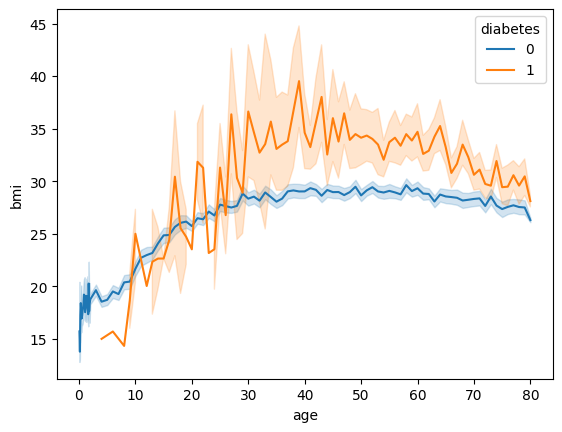

In [206]:
sns.lineplot(df, x= df['age'], y=df['bmi'], hue = df['diabetes'])

# #zmian danych kolumny smoking_history do formatu numerycznego

In [207]:
smoking_history_mapping = { 'No Info': -1,'never': 0,  'ever': 2, 'former': 2, 'not current': 3, 'current': 4}
df['smoking_history'] = df['smoking_history'].map(smoking_history_mapping)
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,0,54.0,0,0,-1,27.32,6.6,80,0
2,1,28.0,0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,4,23.45,5.0,155,0
4,1,76.0,1,1,4,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
27523,0,28.0,0,0,-1,40.10,6.0,90,0
27524,1,31.0,0,0,4,19.81,6.2,155,0
27525,1,14.0,0,0,0,27.32,6.5,130,0
27526,1,53.0,0,0,0,29.40,6.6,155,0


In [208]:
# Przeliczenie macierzy korelacji
corr_matrix = df.corr()

<Axes: >

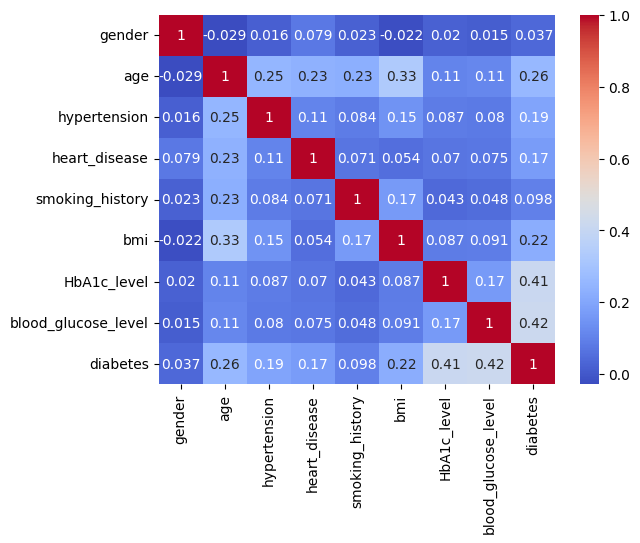

In [209]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# #Podział zbioru danych na trening i testowanie

In [210]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [211]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [212]:
stand = preprocessing.StandardScaler()
X_train = stand.fit_transform(X_train)
X_test = stand.transform(X_test)

# #Trenowanie modelu metodą KNeighborsClassifier

In [213]:
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)

KNeighborsClassifier()

In [214]:
y_pred = knc.predict(X_test)

In [215]:
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nDokładność:")
accuracyKNN = accuracy_score(y_test, y_pred) * 100
print(round(accuracyKNN, 2),'%') 


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      5050
           1       0.88      0.61      0.72       456

    accuracy                           0.96      5506
   macro avg       0.92      0.80      0.85      5506
weighted avg       0.96      0.96      0.96      5506

[[5013   37]
 [ 179  277]]

Dokładność:
96.08 %


# #Trenowanie modelu metodą Naive Bayes

In [216]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [217]:
y_pred = gnb.predict(X_test)

In [218]:
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nDokładność:")
accuracyNB = accuracy_score(y_test, y_pred) * 100
print(round(accuracyNB, 2),'%') 


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      0.93      0.95      5050
           1       0.45      0.66      0.54       456

    accuracy                           0.91      5506
   macro avg       0.71      0.80      0.74      5506
weighted avg       0.93      0.91      0.91      5506

[[4687  363]
 [ 153  303]]

Dokładność:
90.63 %


# #Trenowanie modelu metodą Decision Tree







In [219]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [220]:
y_pred = dtc.predict(X_test)

In [221]:
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nDokładność:")
accuracyDT = accuracy_score(y_test, y_pred) * 100
print(round(accuracyDT, 2),'%') 


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      5050
           1       0.72      0.75      0.74       456

    accuracy                           0.96      5506
   macro avg       0.85      0.86      0.86      5506
weighted avg       0.96      0.96      0.96      5506

[[4918  132]
 [ 113  343]]

Dokładność:
95.55 %


# #Trenowanie modelu metodą Random Forest

In [222]:
rfc = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [223]:
y_pred = rfc.predict(X_test)

In [224]:
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nDokładność:")
accuracyRF = accuracy_score(y_test, y_pred) * 100
print(round(accuracyRF, 2),'%') 


Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      5050
           1       0.94      0.71      0.80       456

    accuracy                           0.97      5506
   macro avg       0.96      0.85      0.89      5506
weighted avg       0.97      0.97      0.97      5506

[[5028   22]
 [ 134  322]]

Dokładność:
97.17 %


In [225]:
df1 = pd.DataFrame({
    'Nazwa modelu': ['K Neighbors Classifier', 'Naive Bayes Classifier', 'Decision Tree Classifier', 'Random Forest Classifier'],
    'Accuracy Score':  [ accuracyKNN, accuracyNB, accuracyDT, accuracyRF]
})
df1

,Nazwa modelu,Accuracy Score
0,K Neighbors Classifier,96.077007
1,Naive Bayes Classifier,90.628405
2,Decision Tree Classifier,95.550309
3,Random Forest Classifier,97.166727
